<a href="https://colab.research.google.com/github/2303a52092/2303A52092-Explainable-AI-LAB_PARTICE/blob/main/Lung_Cancer_ExplainableAI_Full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

# Upload your `lung_cancer_dataset.csv` to /content in Colab or change the path below
DATA_PATH = '/content/lung_cancer_dataset.csv'

data = pd.read_csv(DATA_PATH)
print('Shape:', data.shape)

data.head()

Shape: (50000, 11)


,patient_id,age,gender,pack_years,radon_exposure,asbestos_exposure,secondhand_smoke_exposure,copd_diagnosis,alcohol_consumption,family_history,lung_cancer
0,100000,69,Male,66.025244,High,No,No,Yes,Moderate,No,No
1,100001,32,Female,12.780800,High,No,Yes,Yes,Moderate,Yes,Yes
2,100002,89,Female,0.408278,Medium,Yes,Yes,Yes,NaN,No,Yes
3,100003,78,Female,44.065232,Low,No,Yes,No,Moderate,No,Yes
4,100004,38,Female,44.432440,Medium,Yes,No,Yes,NaN,Yes,Yes


In [2]:
# --- Numeric imputation (mean)
num_cols = data.select_dtypes(include=[np.number]).columns
imputer = SimpleImputer(strategy='mean')
data[num_cols] = imputer.fit_transform(data[num_cols])

# --- Categorical imputation (mode)
cat_cols = data.select_dtypes(exclude=[np.number]).columns
for c in cat_cols:
    data[c] = data[c].fillna(data[c].mode()[0])

print('Missing values after imputation:\n', data.isnull().sum())

Missing values after imputation:
 patient_id                   0
age                          0
gender                       0
pack_years                   0
radon_exposure               0
asbestos_exposure            0
secondhand_smoke_exposure    0
copd_diagnosis               0
alcohol_consumption          0
family_history               0
lung_cancer                  0
dtype: int64


In [3]:
# --- Encoding
le = LabelEncoder()
for c in cat_cols:
    data[c] = le.fit_transform(data[c])

print('Categorical columns encoded:', list(cat_cols))

data.head()

Categorical columns encoded: ['gender', 'radon_exposure', 'asbestos_exposure', 'secondhand_smoke_exposure', 'copd_diagnosis', 'alcohol_consumption', 'family_history', 'lung_cancer']


,patient_id,age,gender,pack_years,radon_exposure,asbestos_exposure,secondhand_smoke_exposure,copd_diagnosis,alcohol_consumption,family_history,lung_cancer
0,100000.0,69.0,1,66.025244,0,0,0,1,1,0,0
1,100001.0,32.0,0,12.780800,0,0,1,1,1,1,1
2,100002.0,89.0,0,0.408278,2,1,1,1,0,0,1
3,100003.0,78.0,0,44.065232,1,0,1,0,1,0,1
4,100004.0,38.0,0,44.432440,2,1,0,1,0,1,1


In [4]:
# --- Scaling examples
scaler = StandardScaler()
scaled = scaler.fit_transform(data)
scaled_df = pd.DataFrame(scaled, columns=data.columns)

minmax = MinMaxScaler()
minmax_scaled = minmax.fit_transform(data)
minmax_df = pd.DataFrame(minmax_scaled, columns=data.columns)

print('Standard scaled sample:')
scaled_df.head()

Standard scaled sample:


,patient_id,age,gender,pack_years,radon_exposure,asbestos_exposure,secondhand_smoke_exposure,copd_diagnosis,alcohol_consumption,family_history,lung_cancer
0,-1.732016,0.423364,1.003406,0.556701,-1.226007,-0.993978,-1.002684,0.997363,1.420003,-0.99932,-1.482481
1,-1.731947,-1.121004,-0.996606,-1.288746,-1.226007,-0.993978,0.997324,0.997363,1.420003,1.00068,0.674545
2,-1.731878,1.258157,-0.996606,-1.717576,1.224047,1.006058,0.997324,0.997363,-0.704224,-0.99932,0.674545
3,-1.731808,0.799021,-0.996606,-0.204431,-0.000980,-0.993978,0.997324,-1.002643,1.420003,-0.99932,0.674545
4,-1.731739,-0.870566,-0.996606,-0.191703,1.224047,1.006058,-1.002684,0.997363,-0.704224,1.00068,0.674545


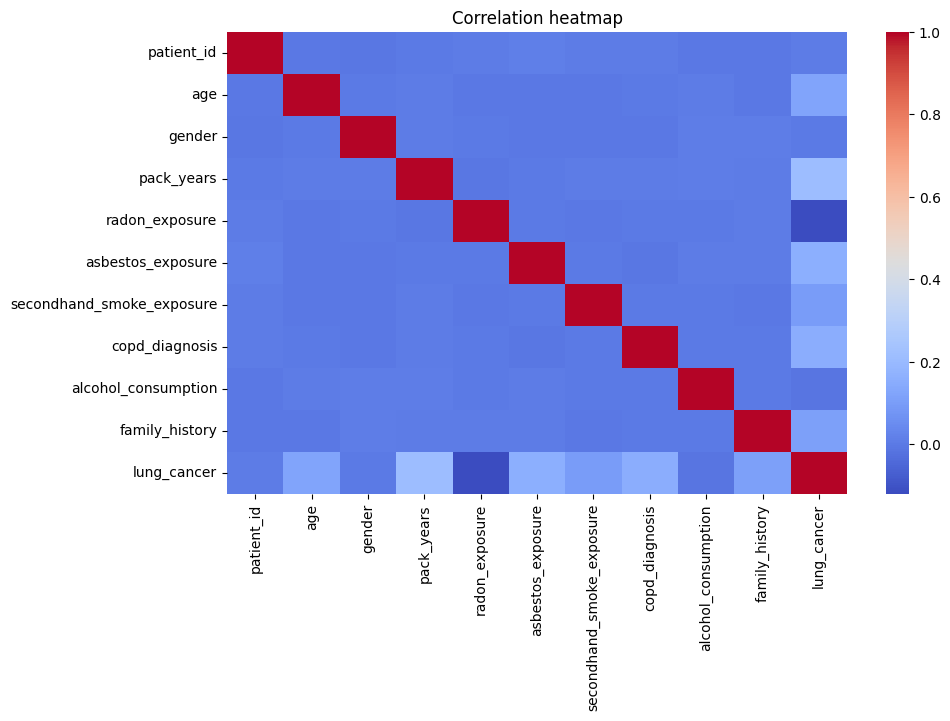

In [5]:
# --- Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), cmap='coolwarm')
plt.title('Correlation heatmap')
plt.show()

---


# 📘 Section: 02 Visualization
---

(50000, 11)


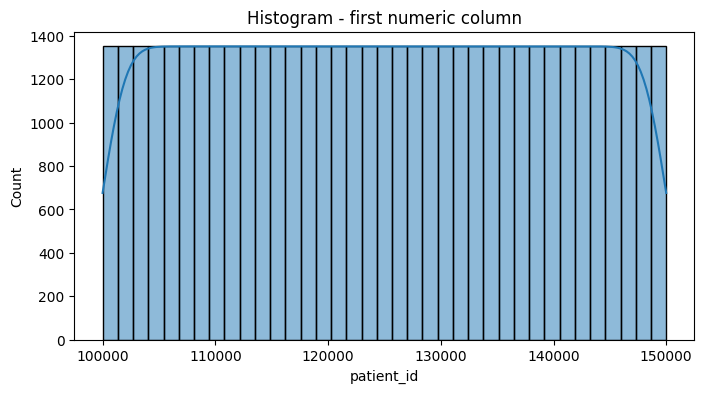

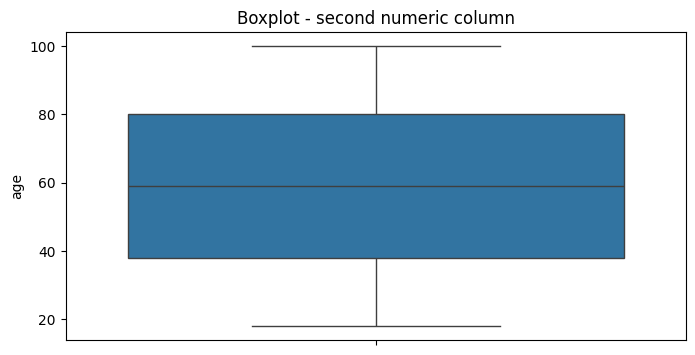

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np

DATA_PATH = '/content/lung_cancer_dataset.csv'
data = pd.read_csv(DATA_PATH)

# Apply preprocessing steps to ensure data is numeric for correlation
# Impute missing values (using mean for numeric, mode for categorical)
for col in data.select_dtypes(include=[np.number]).columns:
    data[col] = data[col].fillna(data[col].mean())

for col in data.select_dtypes(exclude=[np.number]).columns:
    data[col] = data[col].fillna(data[col].mode()[0])
    # Encode categorical columns
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

# quick info
print(data.shape)

# Basic plots examples
plt.figure(figsize=(8,4))
if data.select_dtypes(include=['number']).shape[1] > 0:
    sns.histplot(data.select_dtypes(include=['number']).iloc[:,0], kde=True)
    plt.title('Histogram - first numeric column')
    plt.show()

plt.figure(figsize=(8,4))
if data.select_dtypes(include=['number']).shape[1] > 1:
    sns.boxplot(y=data.select_dtypes(include=['number']).iloc[:,1])
    plt.title('Boxplot - second numeric column')
    plt.show()

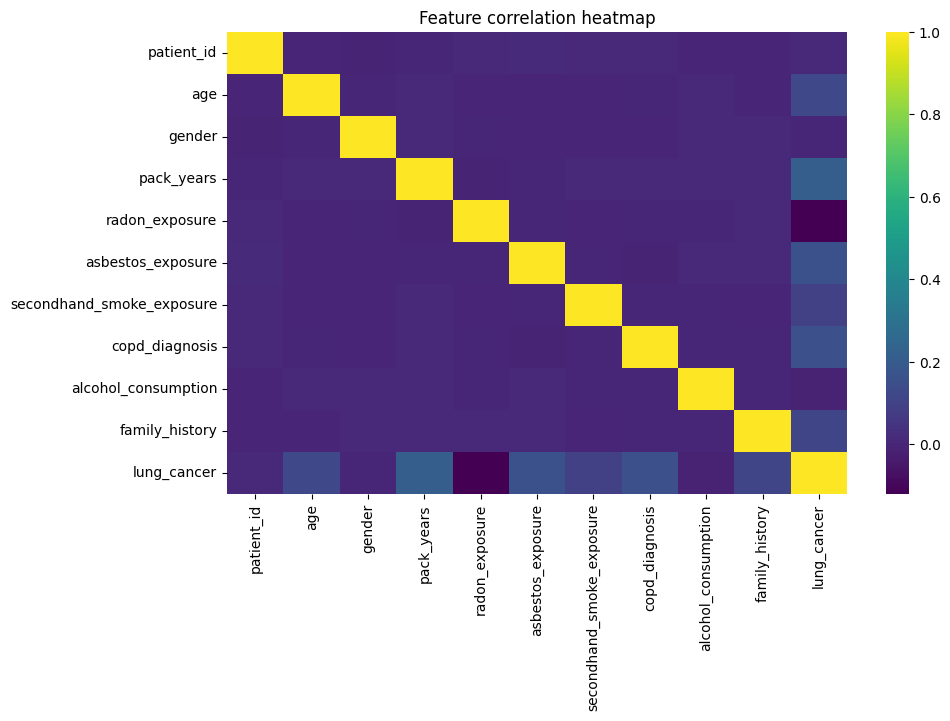

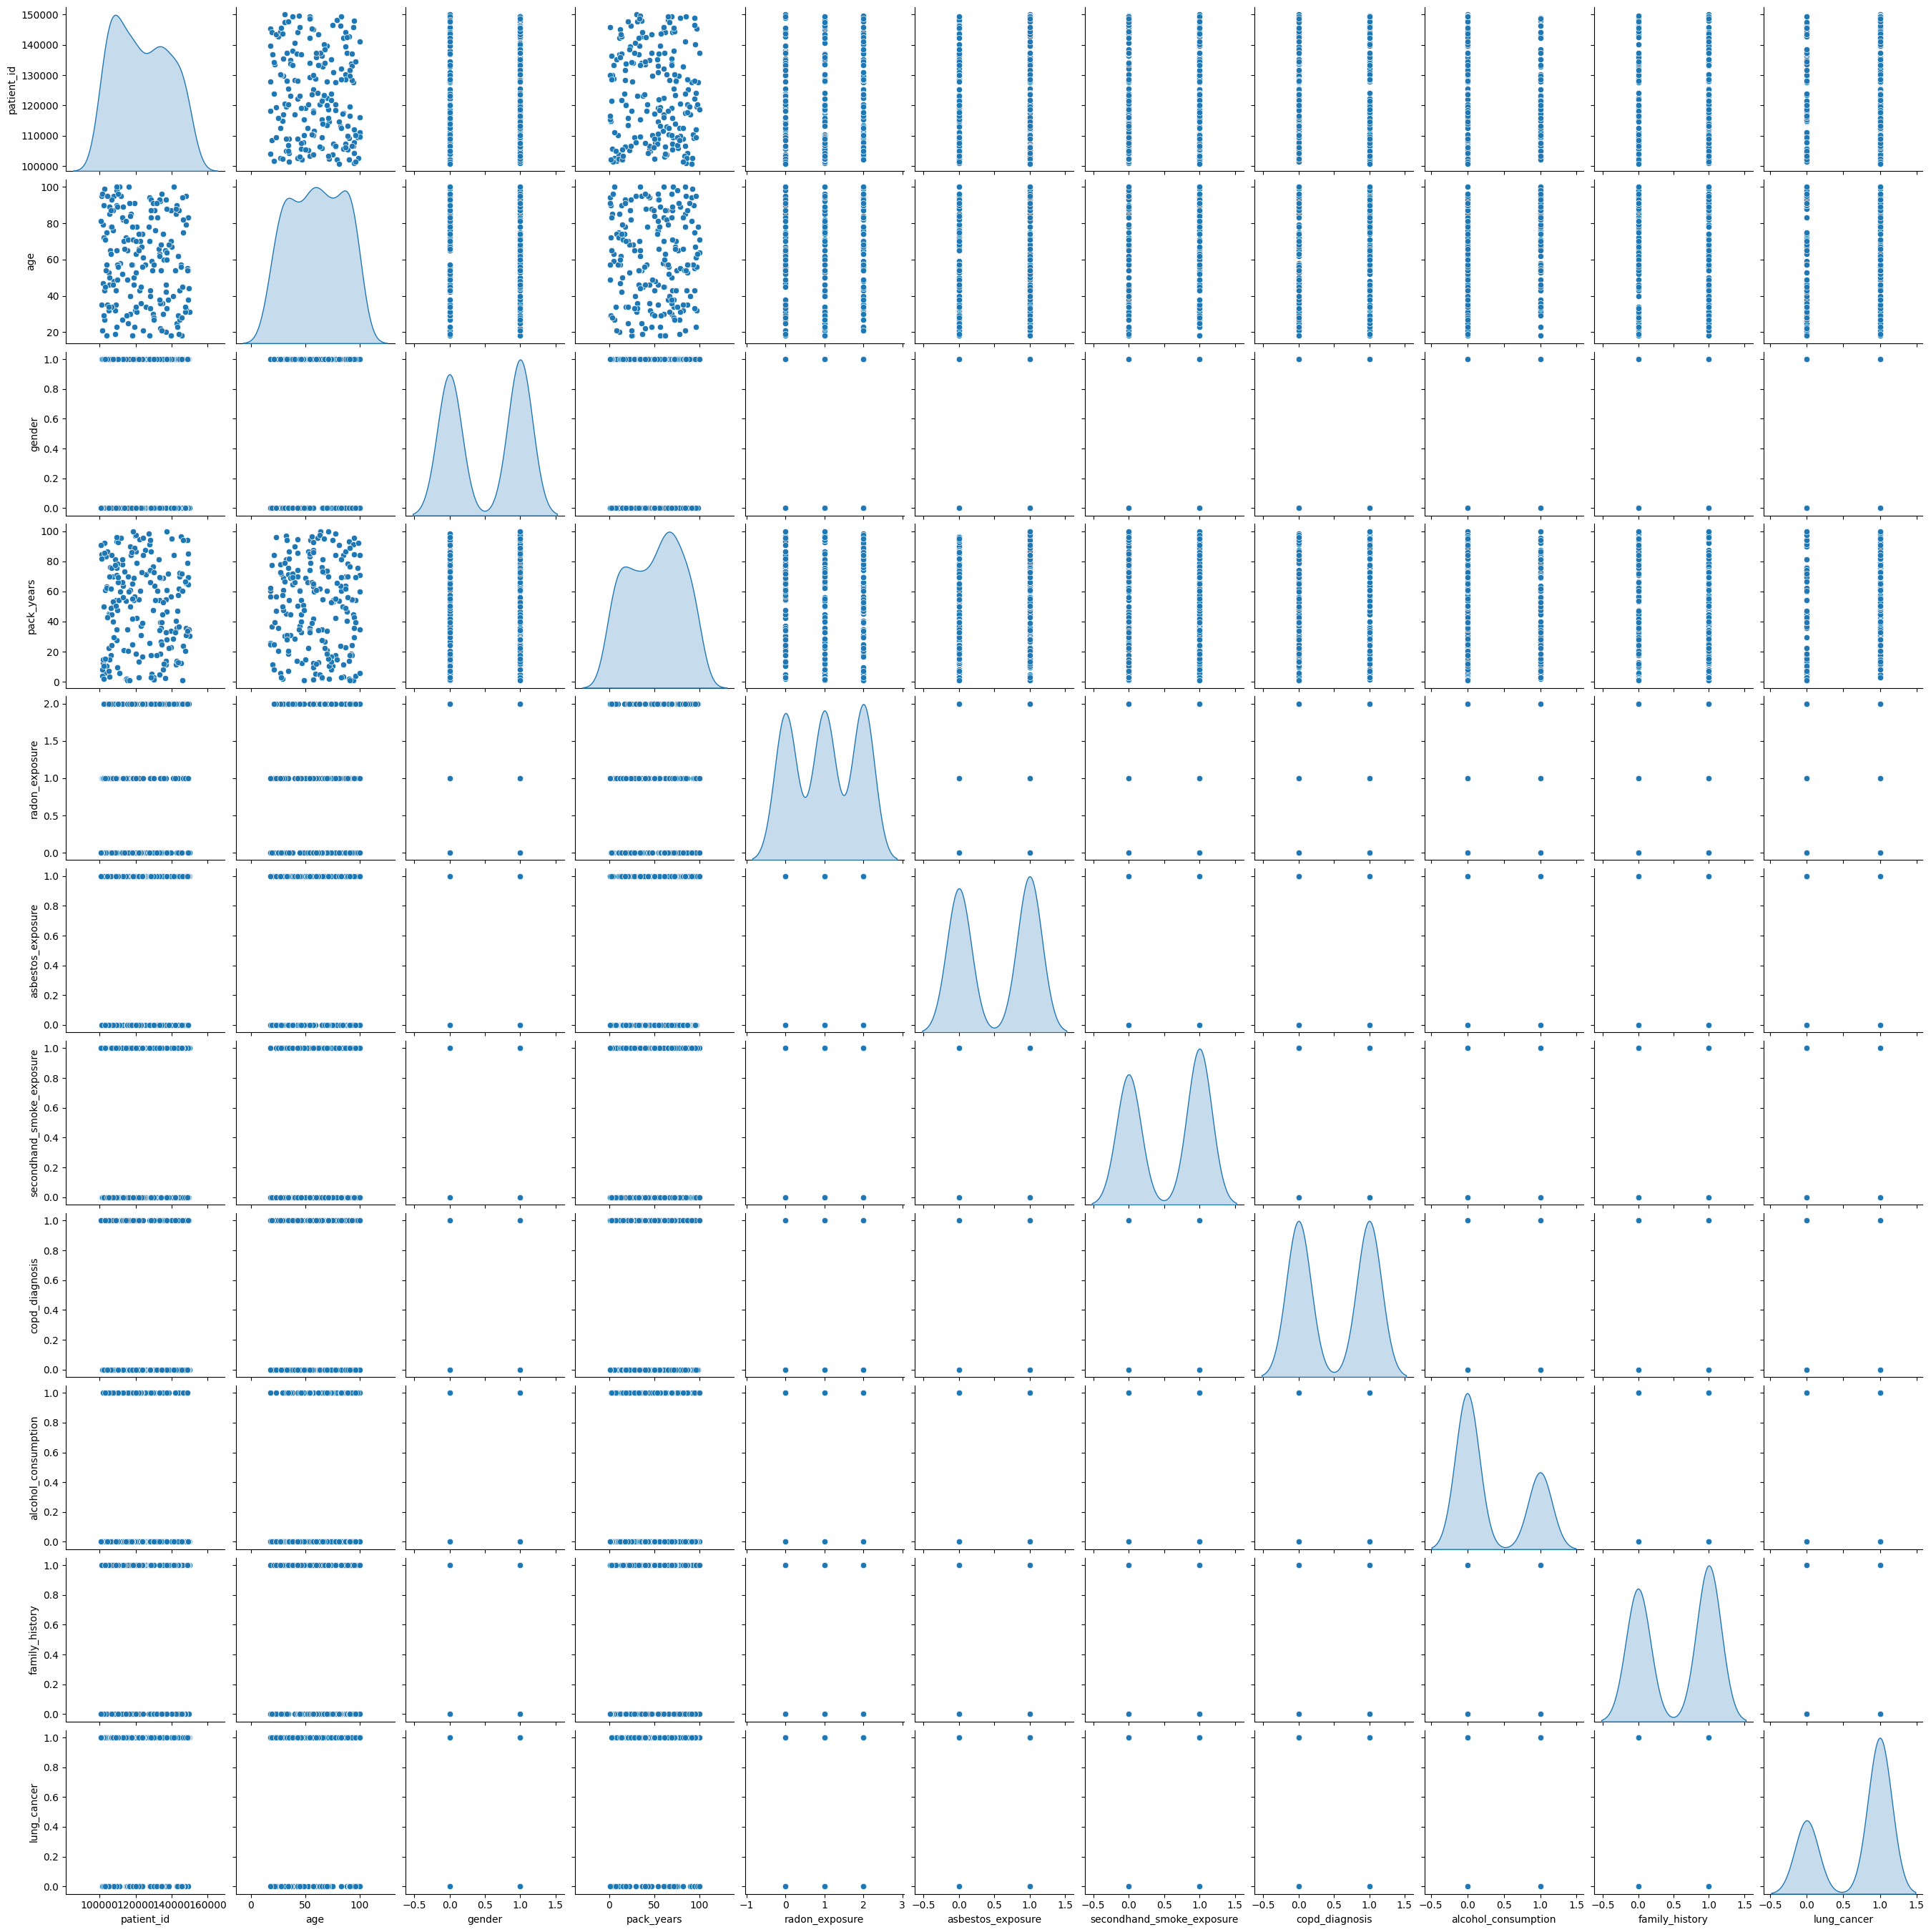

In [14]:
# Advanced plots
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), cmap='viridis')
plt.title('Feature correlation heatmap')
plt.show()

# Pairplot (sampled)
try:
    sns.pairplot(data.sample(min(200, len(data))), diag_kind='kde')
    plt.show()
except Exception as e:
    print('Pairplot skipped (too many columns or other issue):', e)

---


# 📘 Section: 03 Machine Learning Models
---

                Model  Accuracy  Precision    Recall        F1       AUC
0  LogisticRegression    0.7162   0.744676  0.894217  0.812624  0.733412
1        DecisionTree    0.6575   0.753260  0.747021  0.750128  0.603466
2                 KNN    0.6962   0.752828  0.831590  0.790251  0.681510
3          NaiveBayes    0.7248   0.741690  0.920808  0.821600  0.744754
4                 SVM    0.7319   0.742077  0.935629  0.827688  0.717963


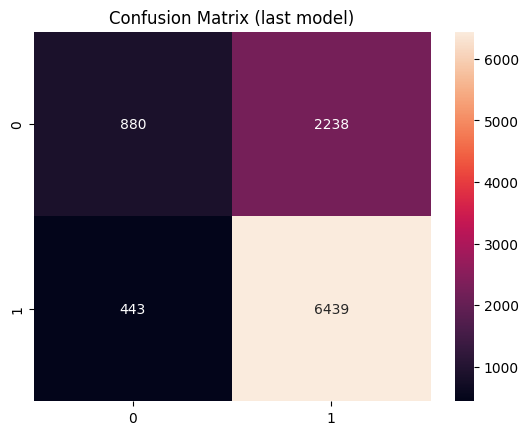

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

DATA_PATH = '/content/lung_cancer_dataset.csv'
data = pd.read_csv(DATA_PATH)

# Basic preprocessing (simple, safe defaults)
num_cols = data.select_dtypes(include=[np.number]).columns
cat_cols = data.select_dtypes(exclude=[np.number]).columns
for c in cat_cols:
    data[c] = data[c].fillna(data[c].mode()[0])
    data[c] = LabelEncoder().fit_transform(data[c])

# Fill numeric missing
for c in num_cols:
    data[c] = data[c].fillna(data[c].mean())

# Define X,y (assume last column is target)
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'DecisionTree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'NaiveBayes': GaussianNB(),
    'SVM': SVC(probability=True)
}

results = []
for name, m in models.items():
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)
    probs = m.predict_proba(X_test)[:,1] if hasattr(m, 'predict_proba') else None
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    auc = roc_auc_score(y_test, probs) if probs is not None else None
    results.append((name, acc, prec, rec, f1, auc))

import pandas as pd
print(pd.DataFrame(results, columns=['Model','Accuracy','Precision','Recall','F1','AUC']))

# Confusion matrix for last model
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix (last model)')
plt.show()

---


# 📘 Section: 04 Ensemble Learning
---

In [11]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

DATA_PATH = '/content/lung_cancer_dataset.csv'
data = pd.read_csv(DATA_PATH)

# Simple preprocessing
for c in data.select_dtypes(exclude=['number']).columns:
    data[c] = data[c].fillna(data[c].mode()[0])
    data[c] = data[c].astype('category').cat.codes
for c in data.select_dtypes(include=['number']).columns:
    data[c] = data[c].fillna(data[c].mean())

X = data.iloc[:,:-1]
y = data.iloc[:,-1]
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100)
ada = AdaBoostClassifier(n_estimators=100)
gb = GradientBoostingClassifier(n_estimators=100)

for name, clf in [('RandomForest', rf), ('AdaBoost', ada), ('GradientBoosting', gb)]:
    clf.fit(X_train, y_train)
    print(name, 'accuracy:', accuracy_score(y_test, clf.predict(X_test)))

voting = VotingClassifier([('rf', rf), ('gb', gb), ('ada', ada)], voting='soft')
voting.fit(X_train, y_train)
print('Voting accuracy:', accuracy_score(y_test, voting.predict(X_test)))

RandomForest accuracy: 0.7151
AdaBoost accuracy: 0.742
GradientBoosting accuracy: 0.7391
Voting accuracy: 0.7384


---


# 📘 Section: 05 Deep Learning
---

Epoch 1/25


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7067 - loss: 0.5641 - val_accuracy: 0.7222 - val_loss: 0.5342
Epoch 2/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7261 - loss: 0.5390 - val_accuracy: 0.7262 - val_loss: 0.5301
Epoch 3/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7262 - loss: 0.5371 - val_accuracy: 0.7271 - val_loss: 0.5301
Epoch 4/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7271 - loss: 0.5334 - val_accuracy: 0.7284 - val_loss: 0.5249
Epoch 5/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7339 - loss: 0.5258 - val_accuracy: 0.7308 - val_loss: 0.5238
Epoch 6/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7343 - loss: 0.5239 - val_accuracy: 0.7296 - val_loss: 0.5238
Epoch 7/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7296 - loss: 0.5308 - val_accuracy: 0.7331 - val_loss: 0.5230
Epoch 8/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7331 - loss: 0.5268 - val_accurac

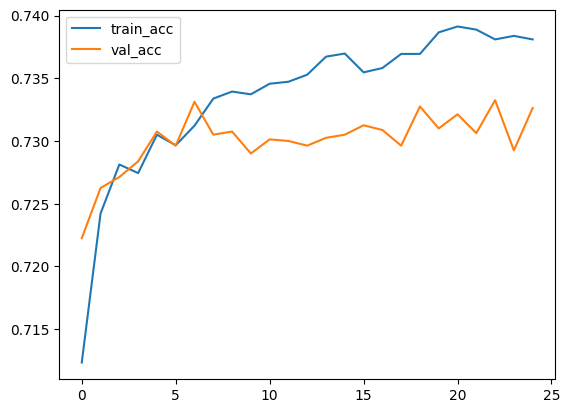

In [12]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

DATA_PATH = '/content/lung_cancer_dataset.csv'
data = pd.read_csv(DATA_PATH)

# Minimal preprocessing
for c in data.select_dtypes(exclude=['number']).columns:
    data[c] = data[c].fillna(data[c].mode()[0])
    data[c] = data[c].astype('category').cat.codes
for c in data.select_dtypes(include=['number']).columns:
    data[c] = data[c].fillna(data[c].mean())

X = data.iloc[:,:-1]
y = data.iloc[:,-1]

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_split=0.2, epochs=25, batch_size=16)

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

---


# 📘 Section: 06 XAI SHAP LIME
---

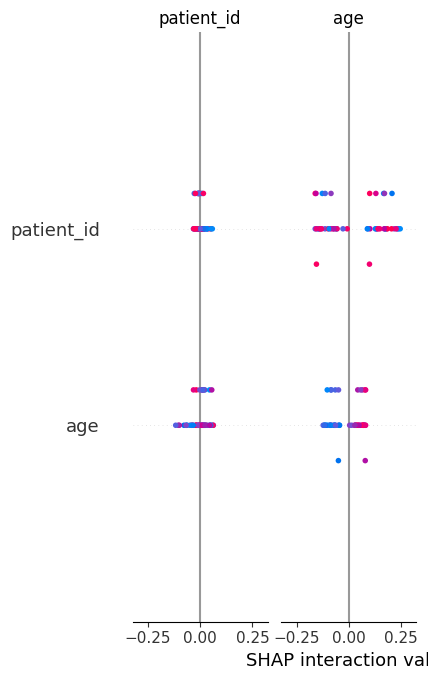

[('pack_years <= -0.87', -0.30241630633131267),
 ('-0.99 < asbestos_exposure <= 1.01', 0.1568018883453387),
 ('family_history <= -1.00', -0.10902261818697136),
 ('-0.87 < age <= 0.00', -0.04971153137989504),
 ('-1.00 < gender <= 1.00', -0.017757178702452133),
 ('alcohol_consumption <= -0.70', 0.009776531295660487)]

In [17]:
!pip install lime
import pandas as pd
import shap
from lime import lime_tabular
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# preprocessing
for c in data.select_dtypes(exclude=['number']).columns:
    data[c] = data[c].fillna(data[c].mode()[0])
    data[c] = data[c].astype('category').cat.codes
for c in data.select_dtypes(include=['number']).columns:
    data[c] = data[c].fillna(data[c].mean())

X = data.iloc[:,:-1]
y = data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_s, y_train)

# SHAP (TreeExplainer is efficient for tree models)
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test_s[:50])
try:
    shap.summary_plot(shap_values, X_test.iloc[:50])
except Exception as e:
    print('To show SHAP plots in Colab, run this cell in Colab and enable JS display:', e)

# LIME
explainer_lime = lime_tabular.LimeTabularExplainer(X_train_s, feature_names=X.columns.tolist(), class_names=['0','1'], mode='classification')
exp = explainer_lime.explain_instance(X_test_s[0], rf.predict_proba, num_features=6)
exp.as_list()